In [3]:
#%pip install openpyxl
import pandas as pd

data = pd.read_excel('dataR2.xlsx', usecols=["Age", "BMI", "Glucose", "Insulin", "HOMA", "Leptin", "Adiponectin", "Resistin", "MCP.1", "Classification"])

# Display the data in order to see if it's all correct
print(data)

     Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  \
0     48  23.500000       70    2.707  0.467409   8.8071     9.702400   
1     83  20.690495       92    3.115  0.706897   8.8438     5.429285   
2     82  23.124670       91    4.498  1.009651  17.9393    22.432040   
3     68  21.367521       77    3.226  0.612725   9.8827     7.169560   
4     86  21.111111       92    3.549  0.805386   6.6994     4.819240   
..   ...        ...      ...      ...       ...      ...          ...   
111   45  26.850000       92    3.330  0.755688  54.6800    12.100000   
112   62  26.840000      100    4.530  1.117400  12.4500    21.420000   
113   65  32.050000       97    5.730  1.370998  61.4800    22.540000   
114   72  25.590000       82    2.820  0.570392  24.9600    33.750000   
115   86  27.180000      138   19.910  6.777364  90.2800    14.110000   

     Resistin    MCP.1  Classification  
0     7.99585  417.114               1  
1     4.06405  468.786               1  


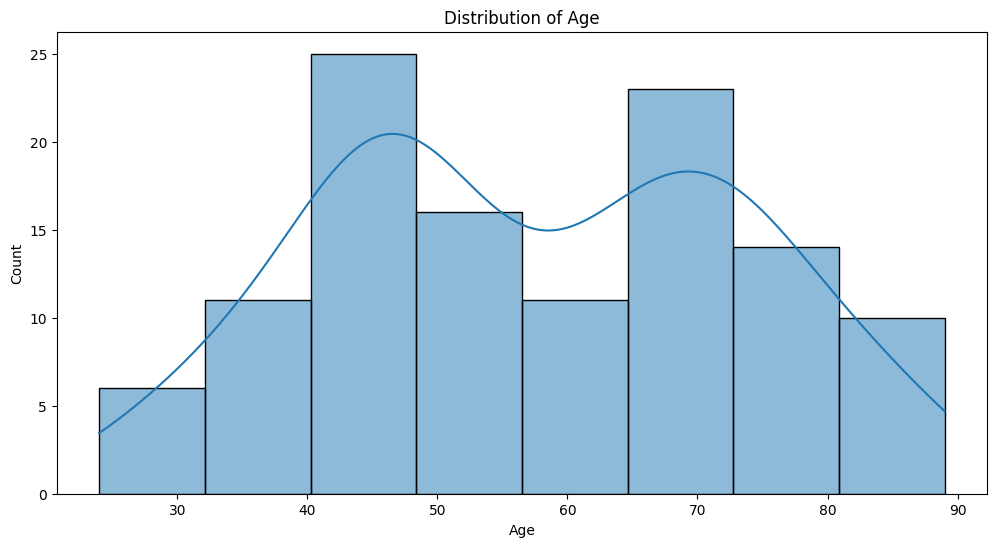

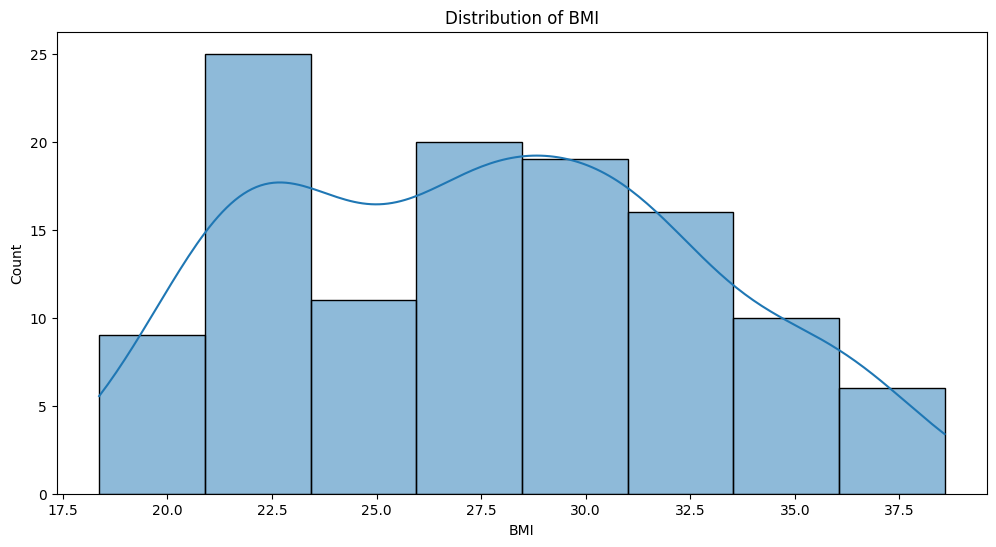

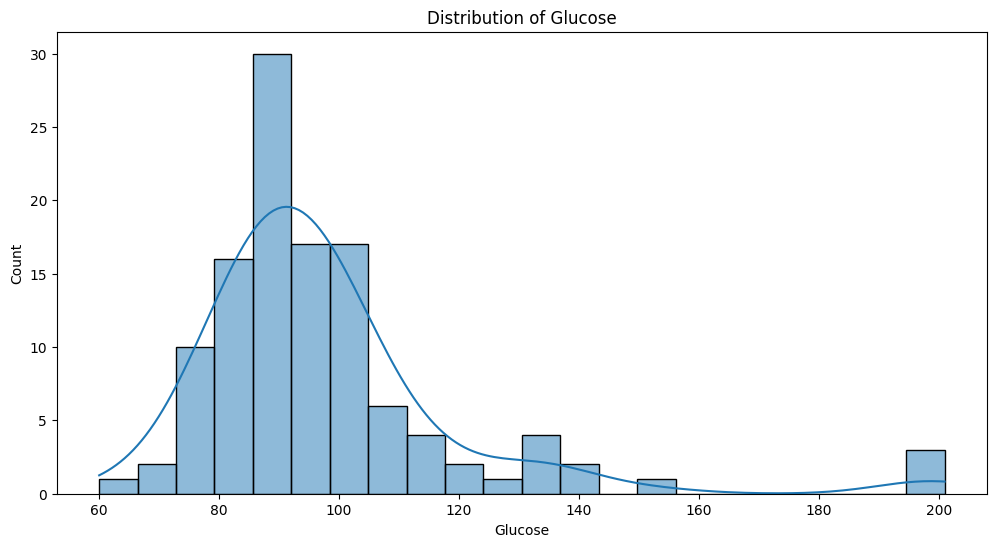

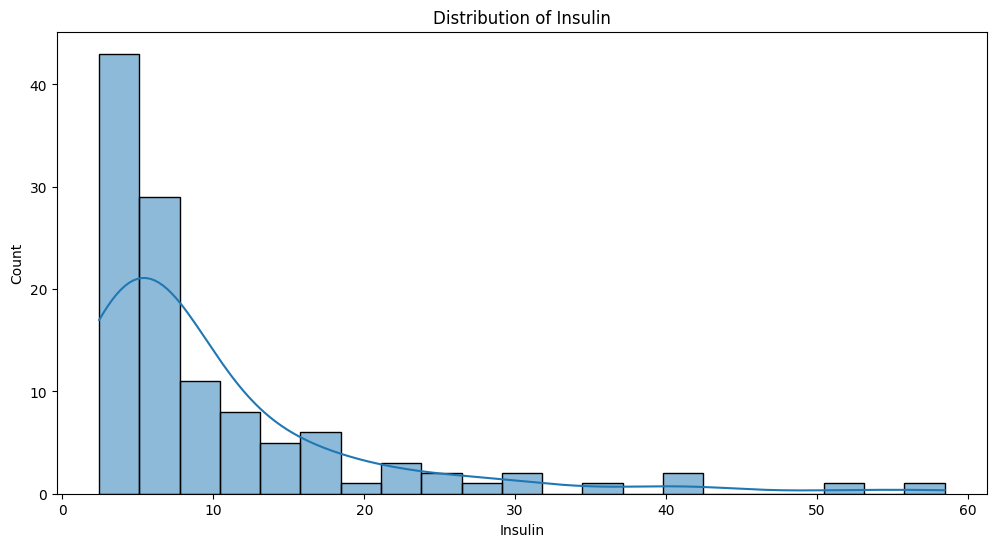

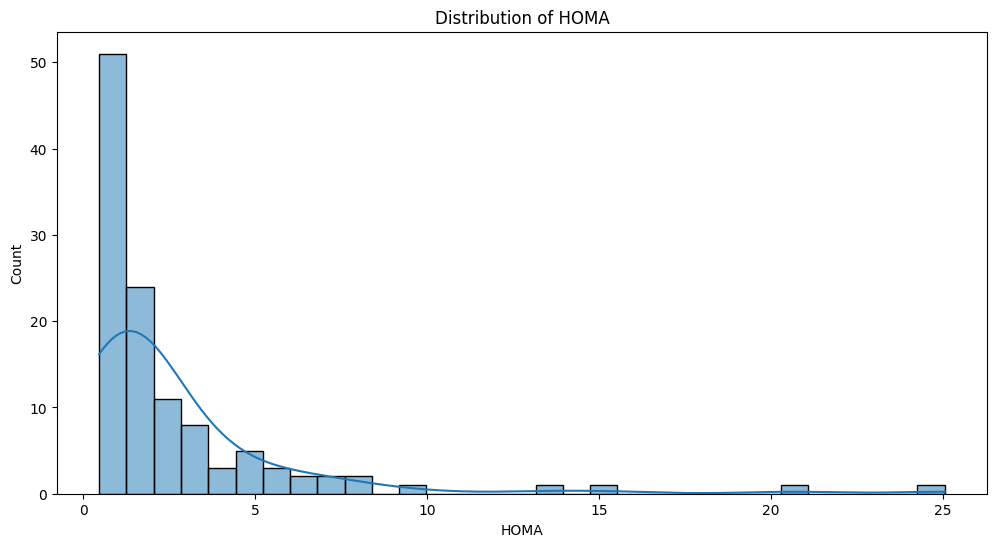

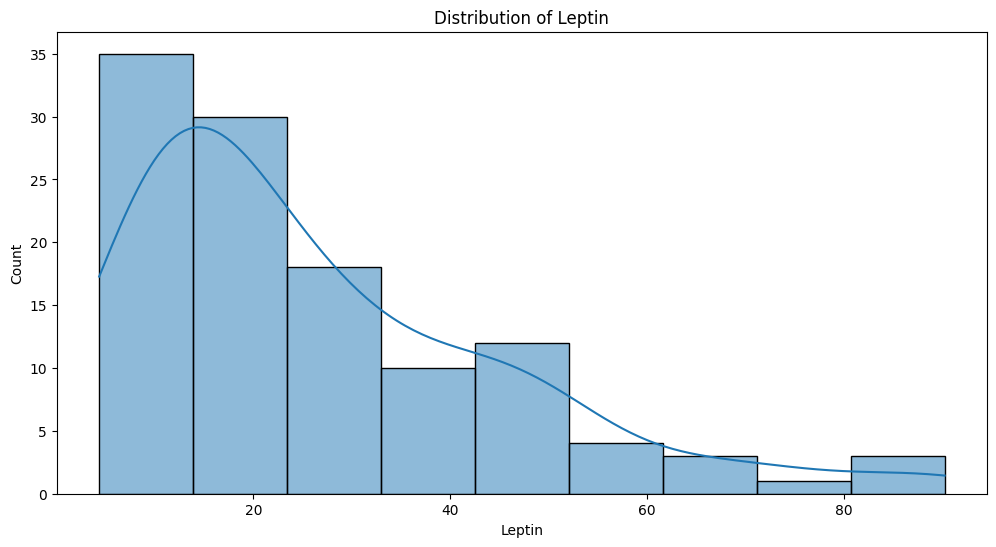

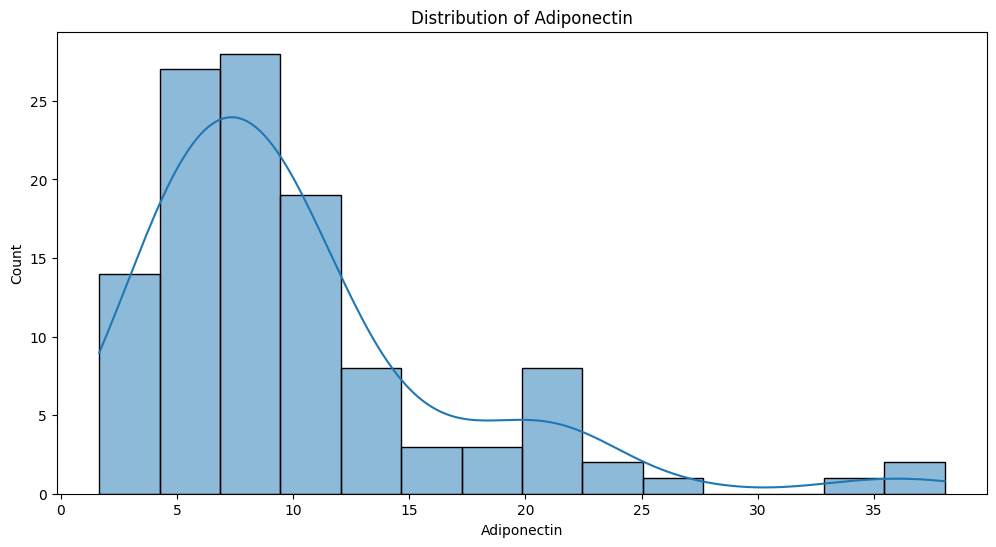

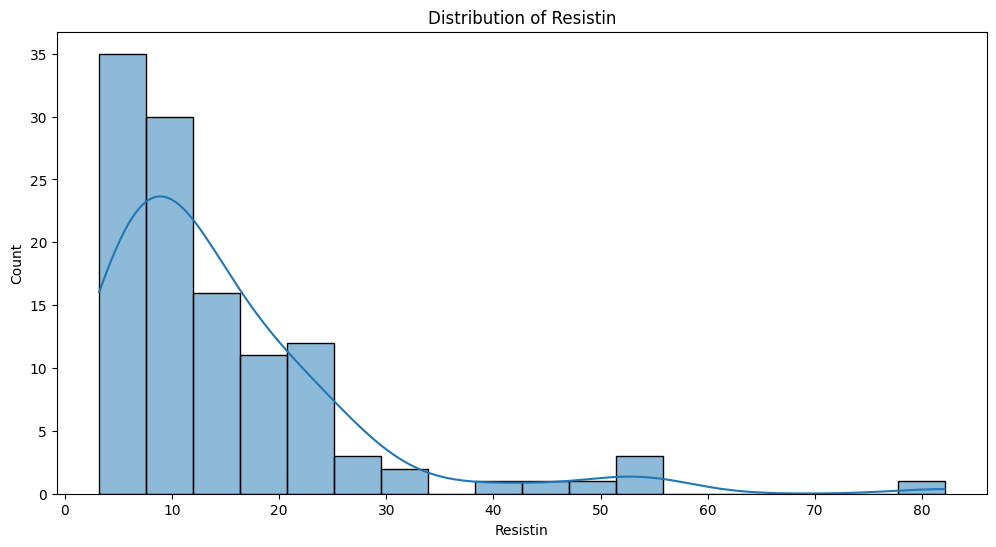

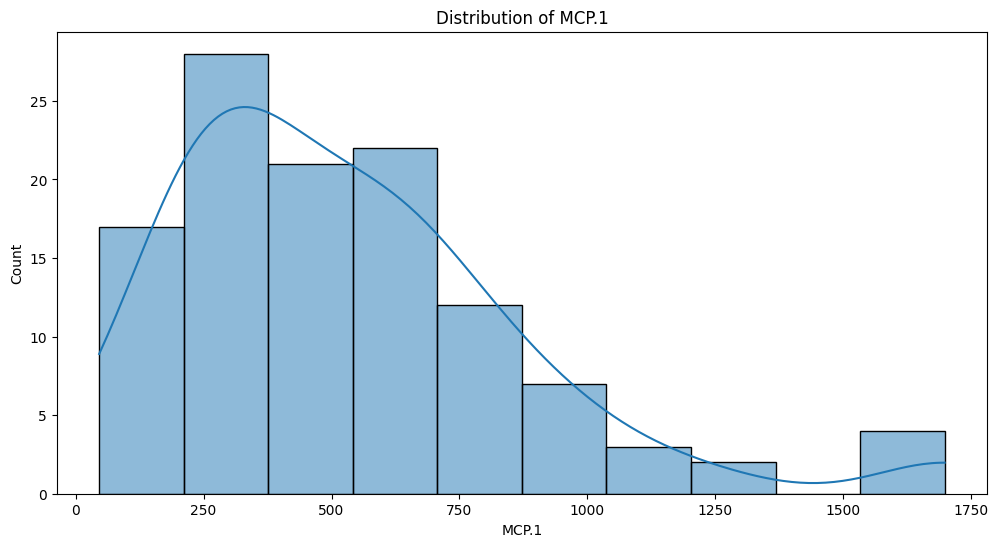

In [ ]:
## A histogram allow us to view the distribution of values ​​for each variable
# and it helps to see the shape of the distribution, detect outliers or extreme values, 
# ​​and compare distributions between classes.

# %pip install seaborn

import matplotlib.pyplot as plt
import seaborn as sns

columns = data.columns[:-1]  # Exclude the last column "Classification"

for column in columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

In [ ]:
## Box plots for each variable, grouped by the "Classification" column.
import plotly.graph_objects as go

# We're labeling the classes 1 and 2 as "Has Breast Cancer" and "No Breast Cancer"
class_labels = {1: "Has Breast Cancer", 2: "No Breast Cancer"}

for column in columns:
    fig = go.Figure()
    for label in class_labels:
        fig.add_trace(go.Violin(
            y=df[df['Classification'] == label][column],
            name=class_labels[label],
            box_visible=True,
            meanline_visible=True,
            points='all'
        ))
    fig.update_layout(
        title=f'{column} by Classification',
        autosize=False,
        width=1000,
        height=500,
        font=dict(size=18, color="black")
    )
    fig.show()

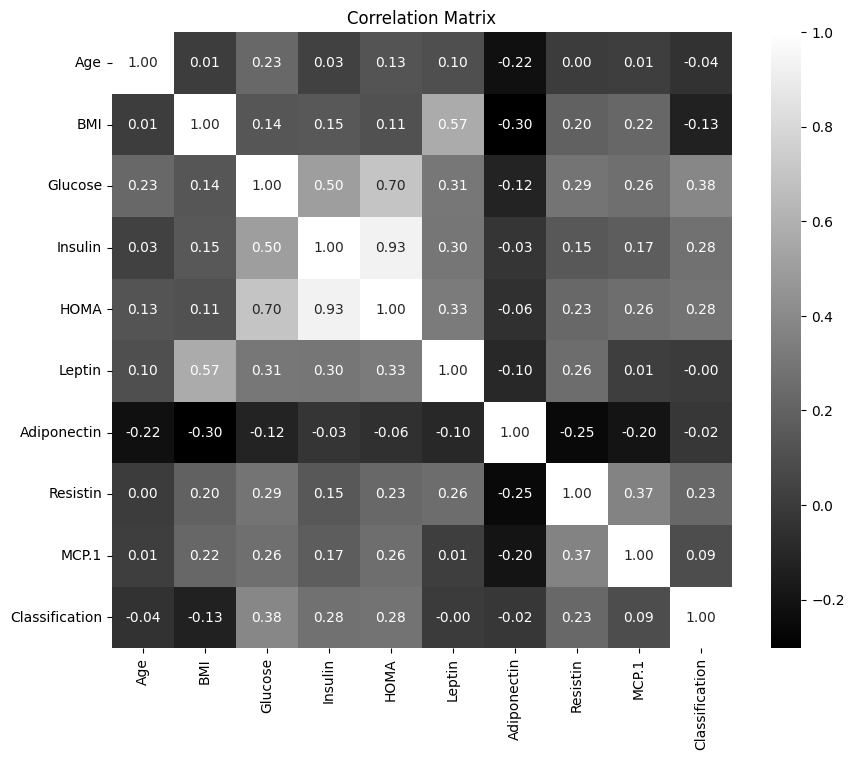

In [ ]:
## Correlation matrix to see how the variables are correlated with each other.

plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='gray', cbar=True)
plt.title('Correlation Matrix')
plt.show()